In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

allData = movies.merge(ratings)

In [2]:
df = pd.merge(movies, ratings)
mdf = pd.concat([df.drop('genres', axis=1), df.genres.str.get_dummies(sep='|')], axis=1)

In [3]:
#get unique genres as 
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

In [9]:
allData


,movieId,title,year,genres,userId,rating,timestamp
0,1,b'Toy Story',1995.0,Adventure|Animation|Children|Comedy|Fantasy,7,5.0,835583333
1,1,b'Toy Story',1995.0,Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1113487849
2,1,b'Toy Story',1995.0,Adventure|Animation|Children|Comedy|Fantasy,13,4.5,1275864236
3,1,b'Toy Story',1995.0,Adventure|Animation|Children|Comedy|Fantasy,16,5.0,855198755
4,1,b'Toy Story',1995.0,Adventure|Animation|Children|Comedy|Fantasy,21,5.0,865106839
...,...,...,...,...,...,...,...
100018,124857,b'Deception',2013.0,Action,516,3.0,1421437360
100019,125916,b'Fifty Shades of Grey',2015.0,Drama,568,0.5,1425047748
100020,126407,b'Face of Terror',2005.0,Action|Drama|Thriller,516,3.0,1422146067
100021,129454,b'JFK: The Smoking Gun',2013.0,Documentary,516,3.0,1425319894


In [11]:
exp_df = allData[['userId', 'movieId', 'rating', 'year', 'title', 'genres', 'year']]

movies_3 = allData.loc[allData['genres'].isin(
    ['Sci-Fi', 'Action', 'Drama', 'Animation', 'Children','Comedy', 'Romance', 
     'Thriller', 'Horror',  'Crime', 'Adventure'])]

mean_ratings = movies_3.groupby([ 'genres', 'year'], 
                               as_index=False)['rating'].agg(['mean', 'std', 'count'])

mean_ratings2 = mean_ratings [ mean_ratings['count'] >= 5]

In [12]:
common = df.groupby('title').size().sort_values(ascending=False)[:10]
common

title
b'Silence of the Lambs, The'             337
b'Shawshank Redemption, The'             328
b'Pulp Fiction'                          327
b'Jurassic Park'                         324
b'Forrest Gump'                          318
b'Star Wars: Episode IV - A New Hope'    306
b'Braveheart'                            292
b'Terminator 2: Judgment Day'            278
b'Matrix, The'                           265
b'Fugitive, The'                         250
dtype: int64

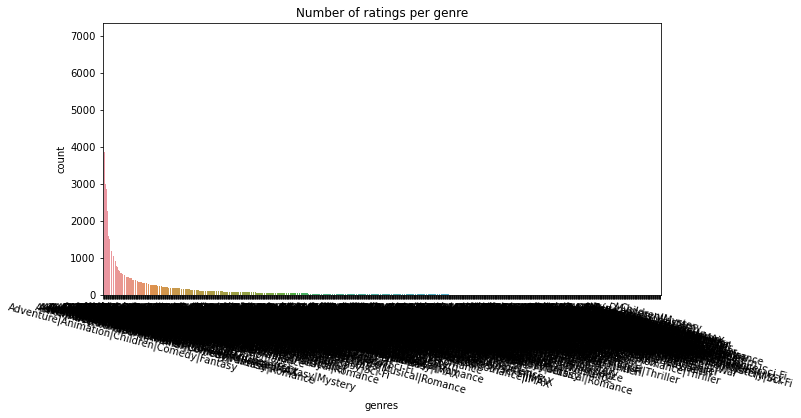

In [17]:
plt.subplots(figsize=(10,5))
sns.countplot(x='genres', order = allData['genres'].value_counts().index, data=allData);
plt.xticks(rotation=-45)
plt.title('Number of ratings per genre');

<AxesSubplot:>

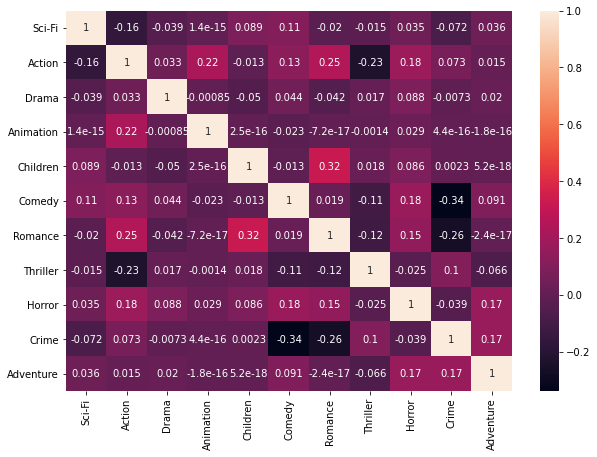

In [15]:
gens = ['Sci-Fi', 'Action', 'Drama', 'Animation', 'Children','Comedy', 'Romance', 
     'Thriller', 'Horror',  'Crime', 'Adventure']

# Year Made vs Rating by Genre
dat = pd.DataFrame()

for g in gens:
    g1 = mean_ratings.loc[g]
    s1 = g1.loc[:]['mean']
    s1 = pd.Series(s1)
    dat = pd.concat([dat,s1], axis=1)
    
dat.columns = gens
datty = dat.fillna(dat.mean())
cory = datty.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(cory, annot=True)